/var/folders/pc/cf_vbc8511g16r9b9_v6fv7m0000gn/T/ipykernel_43171/489748425.py:167: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


mutate 43
mutate 70
mutate 90
found answer in generation [254, 252, 250, 248, 248, 250, 248, 256, 250, 252]
best of best 256
best of best board [['00' '10' '01' '11' '10' '11' '01' '10']
 ['10' '00' '10' '00' '11' '01' '10' '11']
 ['01' '10' '00' '11' '00' '10' '01' '10']
 ['11' '00' '11' '01' '10' '01' '10' '01']
 ['10' '11' '00' '10' '11' '00' '01' '10']
 ['11' '00' '10' '01' '00' '11' '00' '01']
 ['01' '10' '11' '10' '01' '00' '11' '10']
 ['10' '11' '10' '01' '10' '01' '10' '11']]
loop count 107


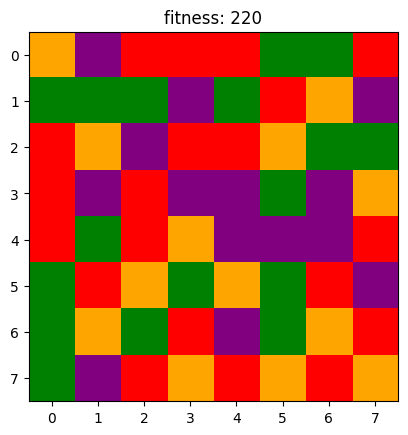

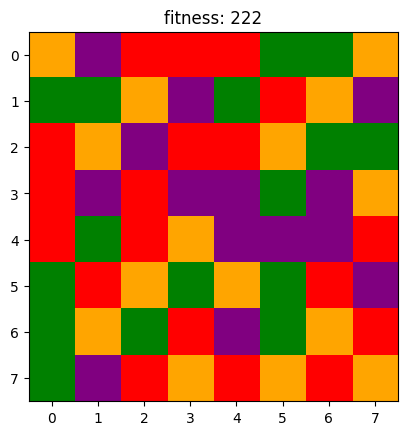

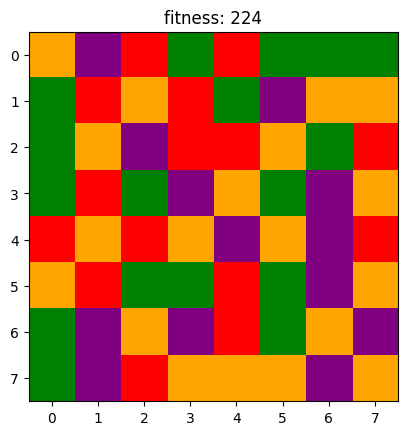

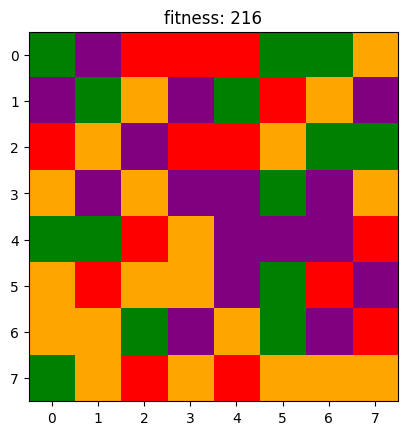

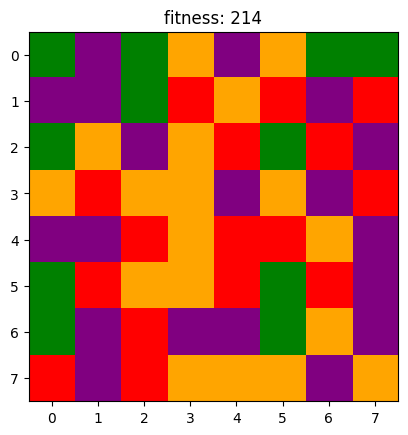

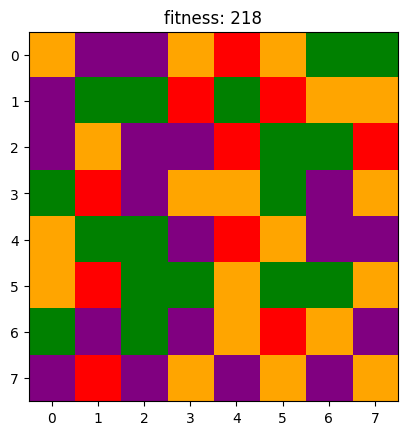

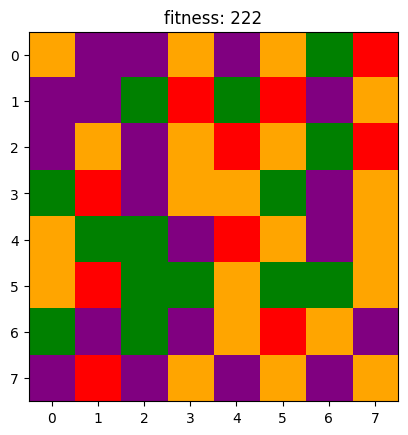

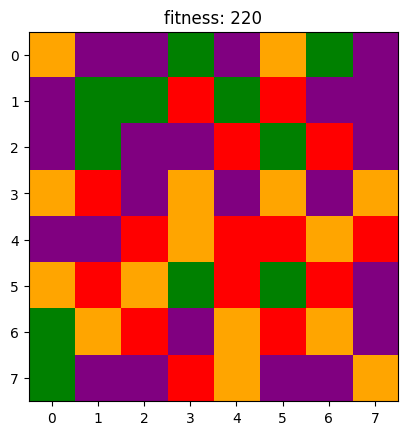

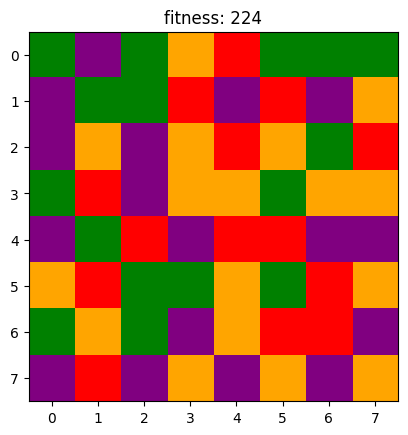

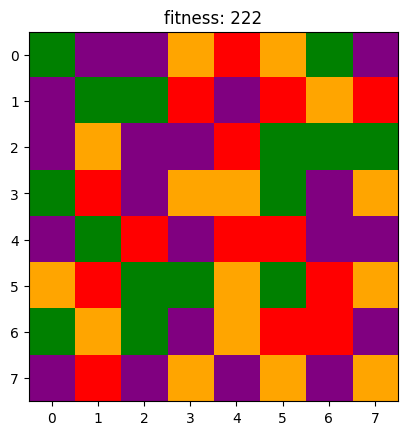

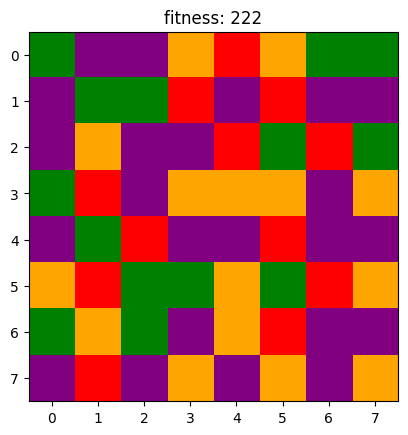

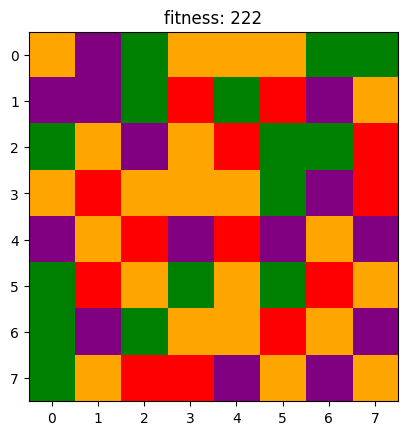

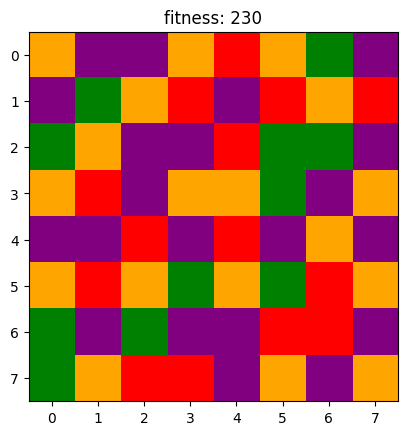

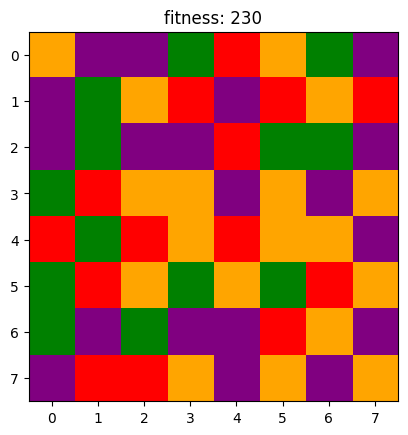

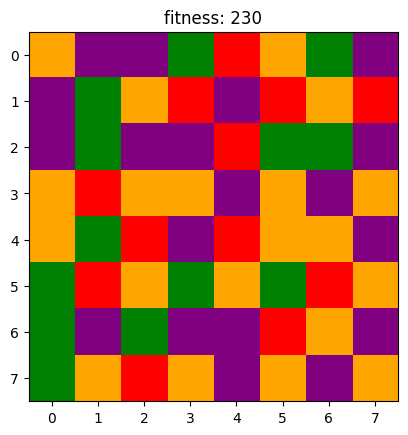

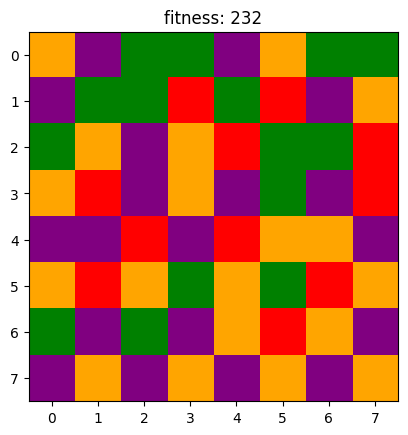

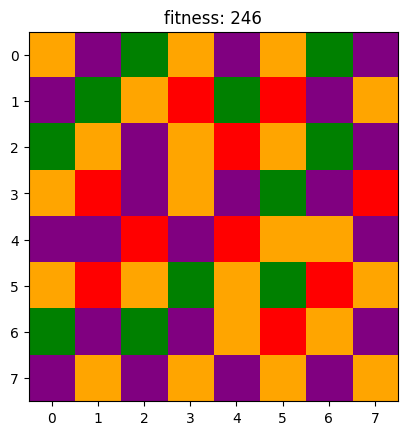

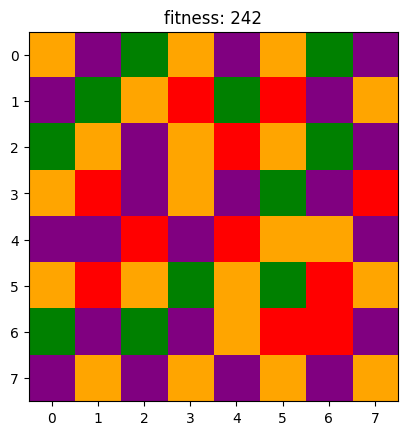

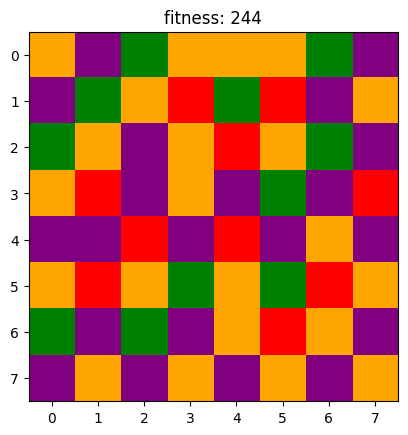

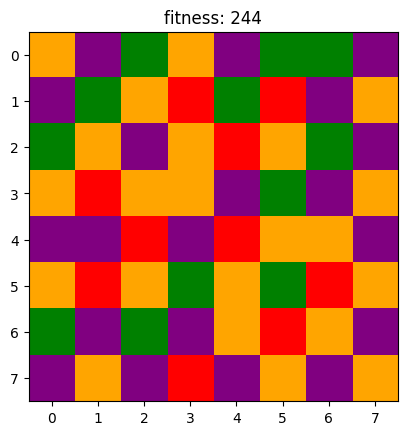

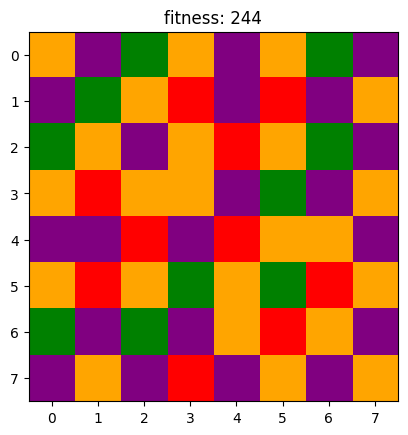

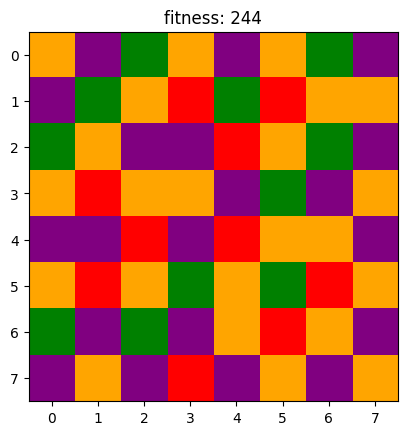

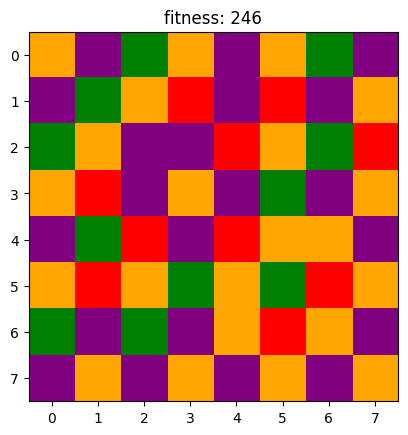

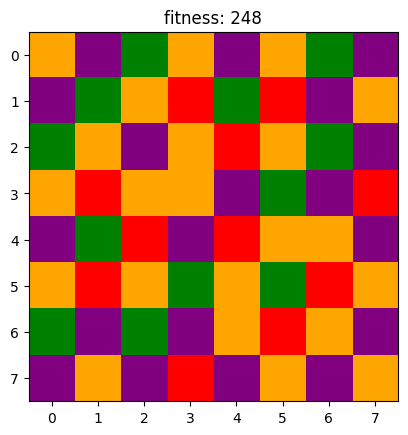

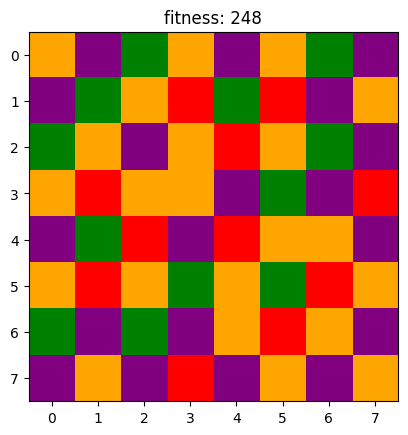

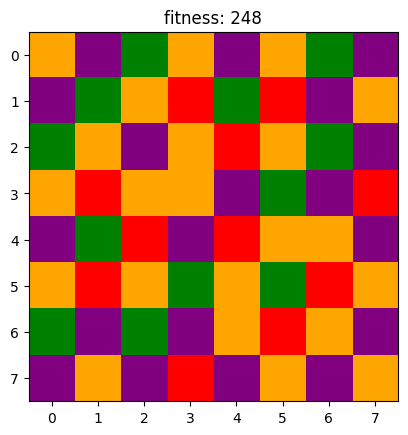

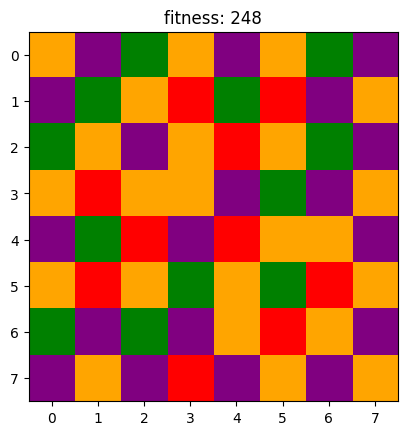

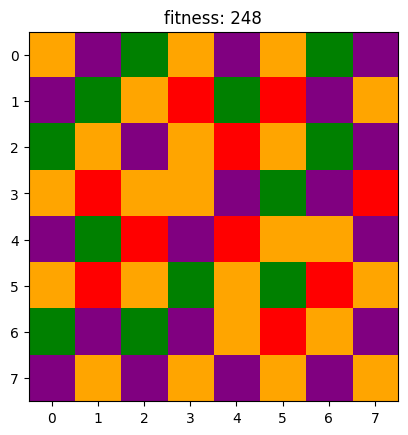

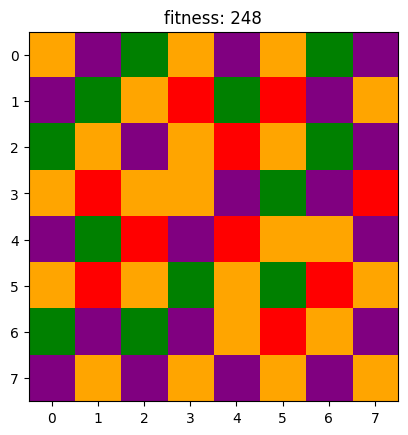

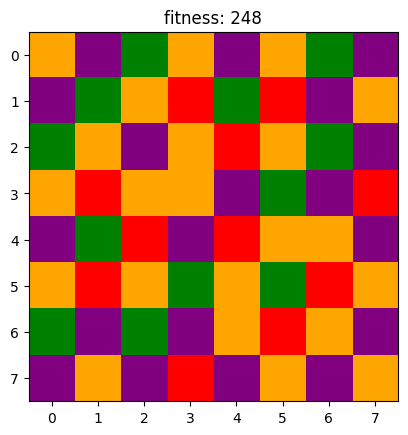

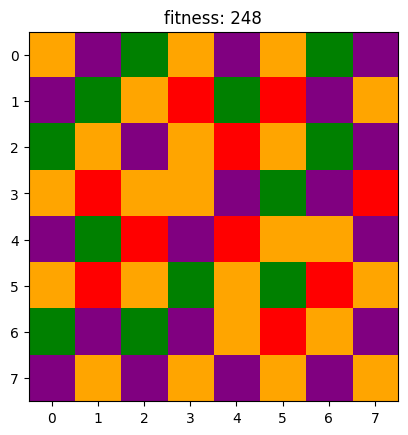

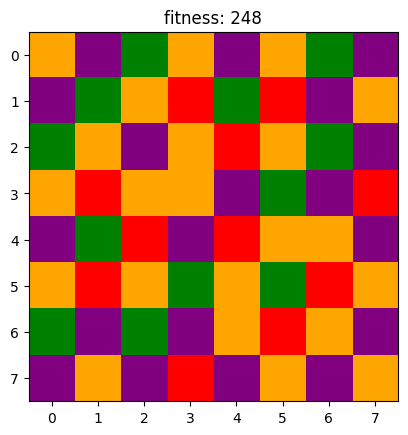

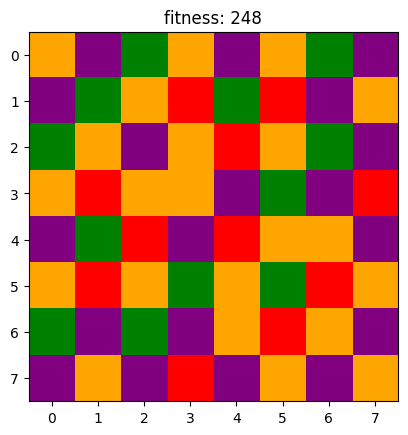

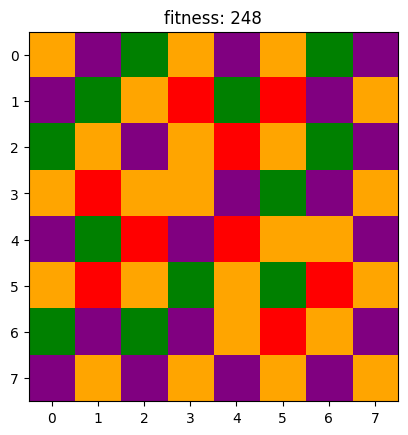

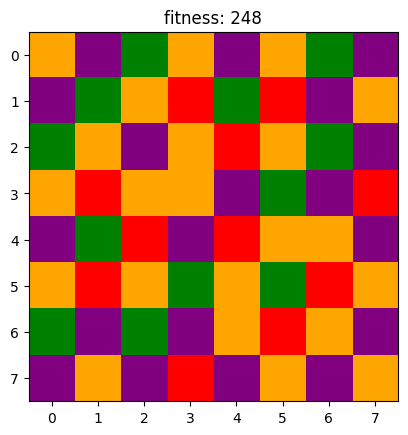

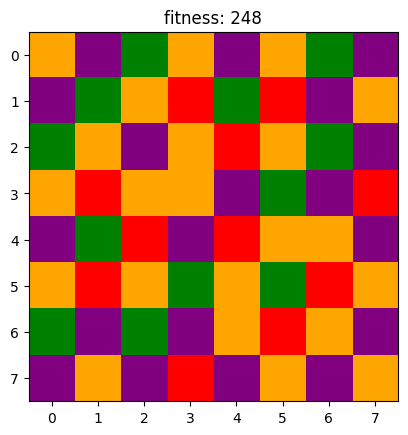

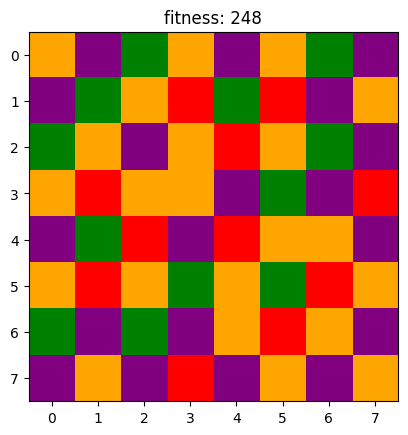

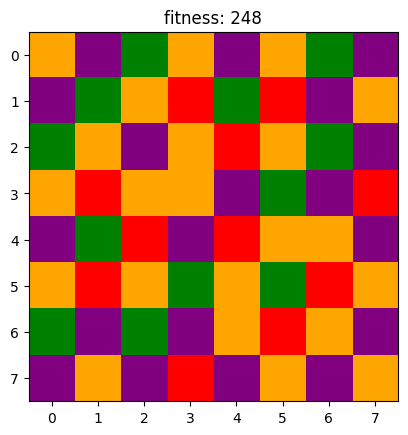

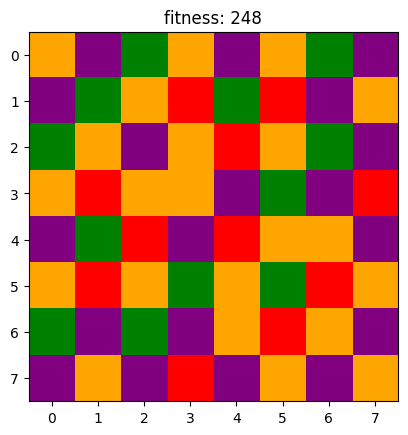

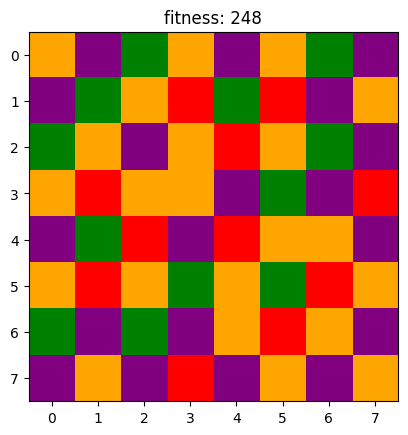

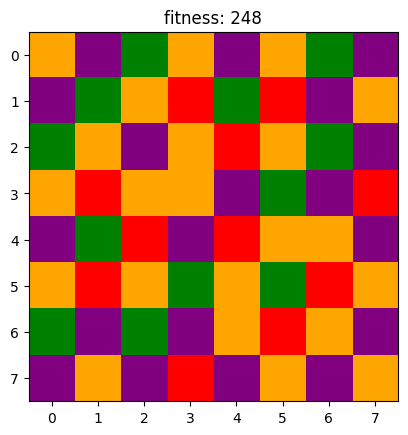

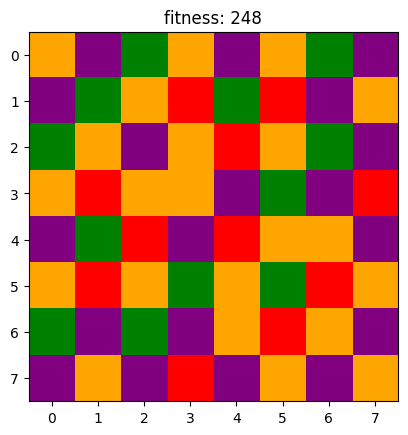

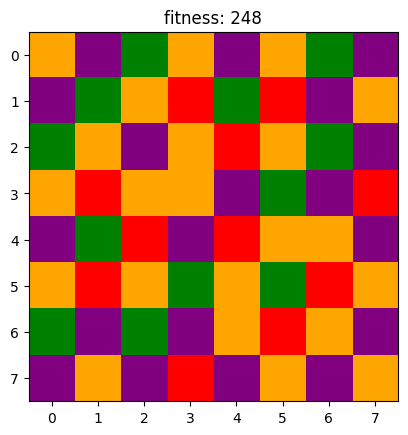

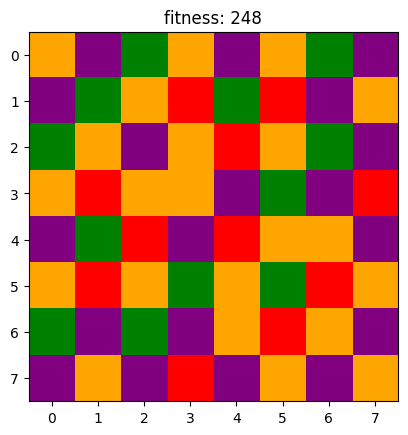

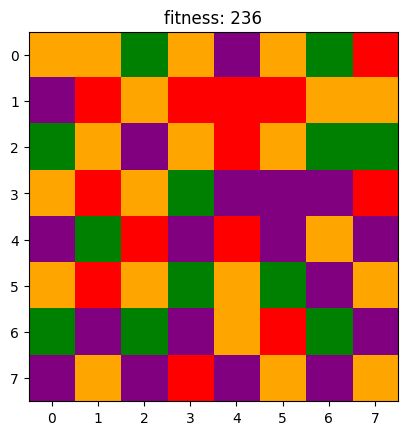

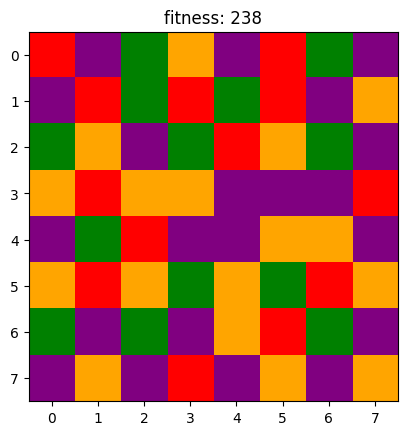

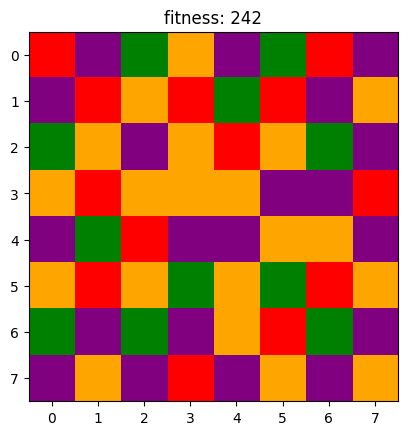

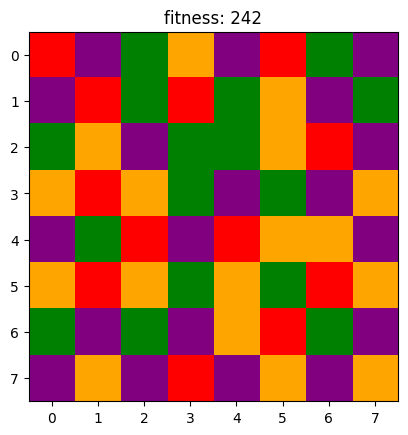

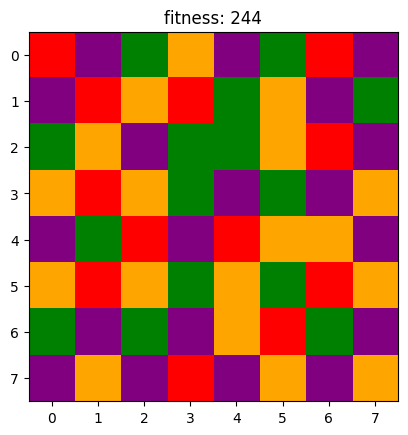

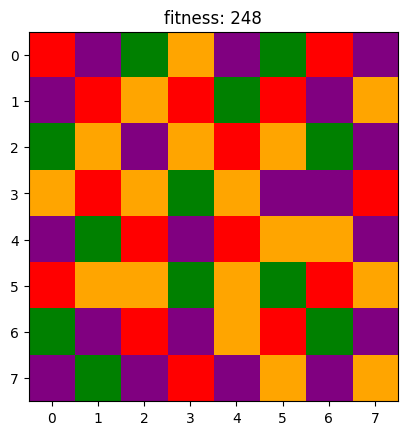

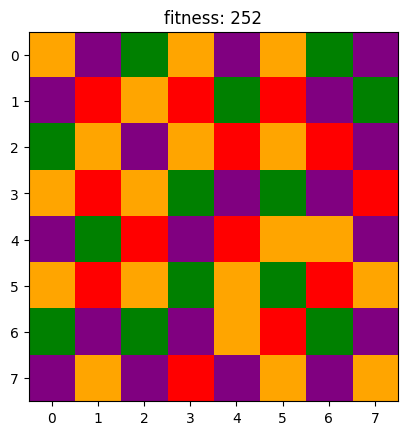

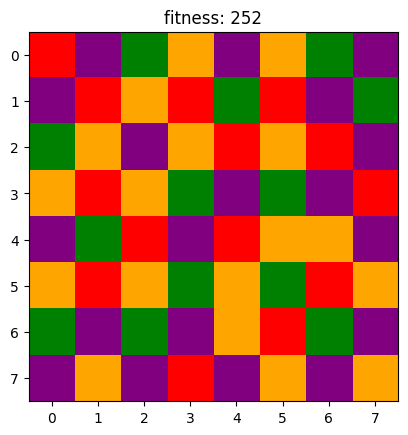

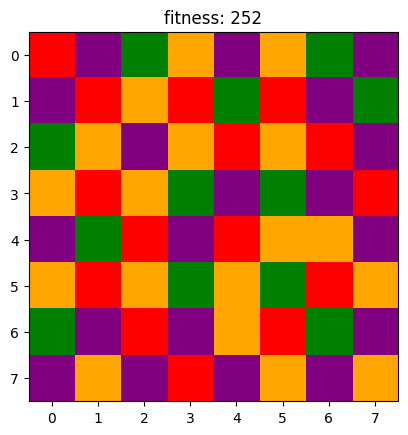

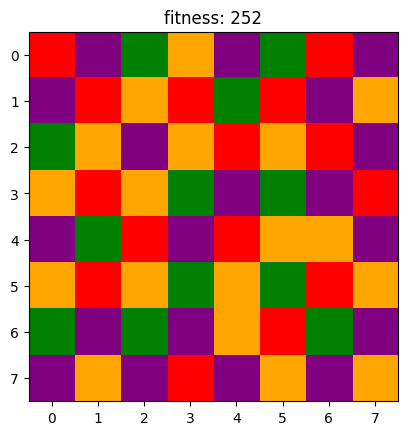

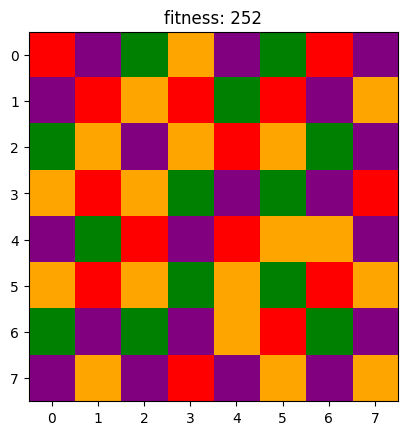

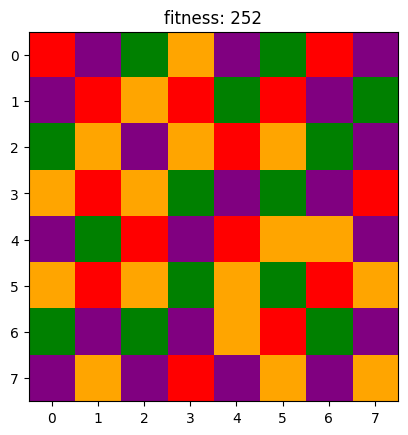

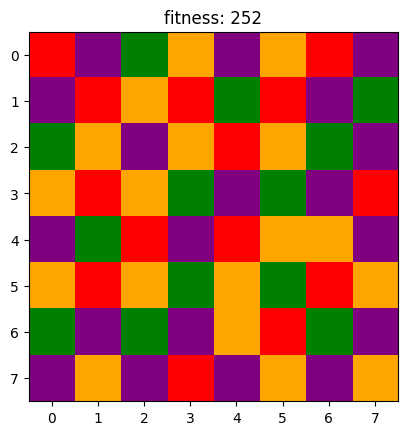

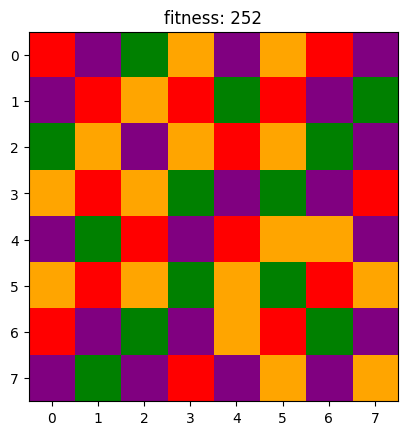

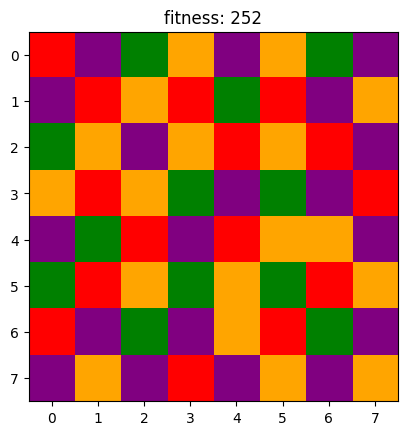

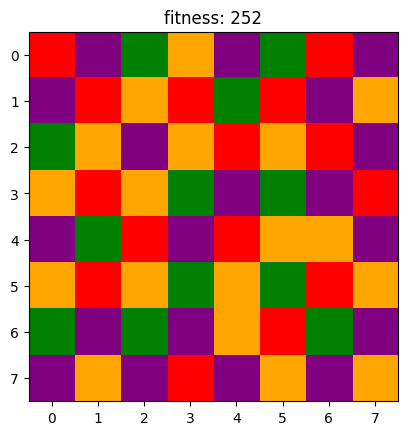

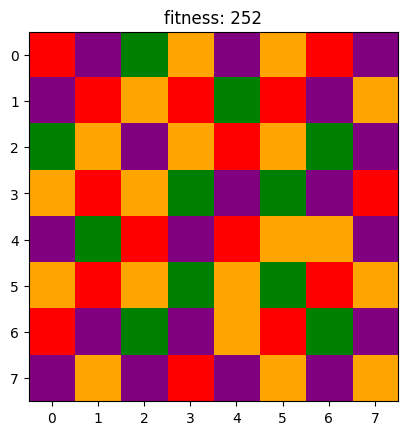

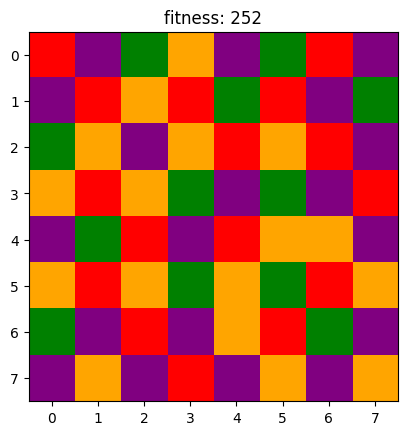

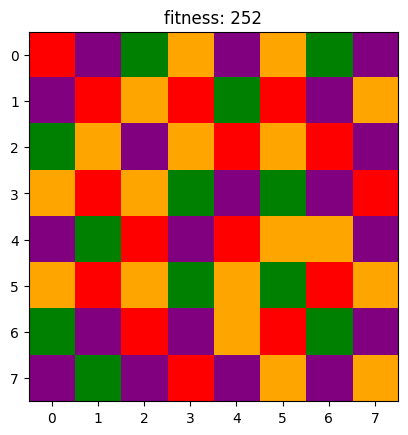

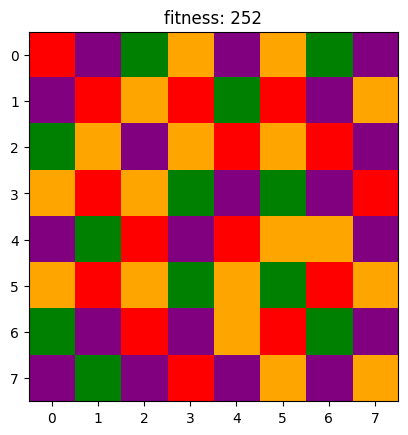

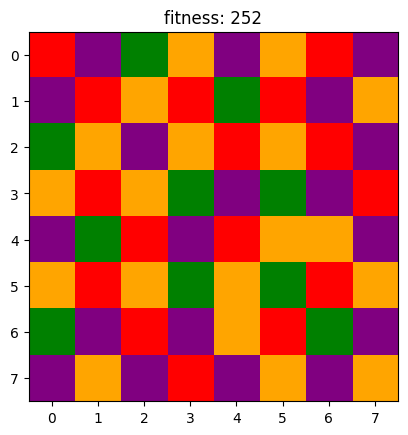

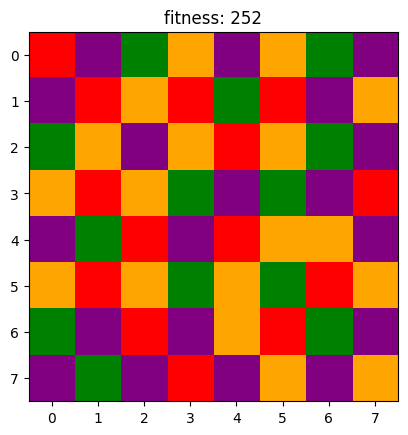

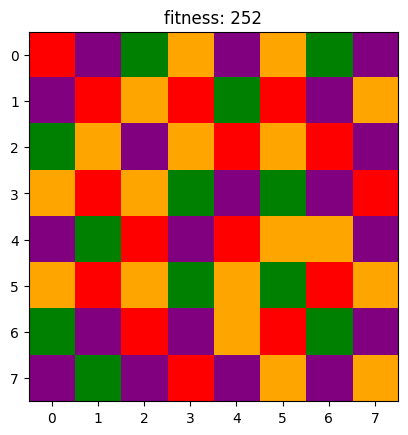

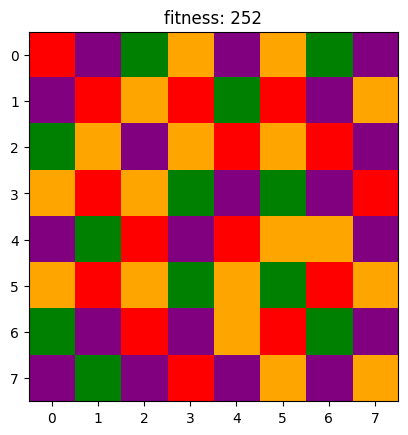

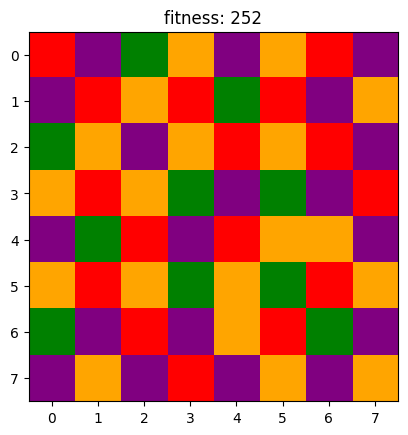

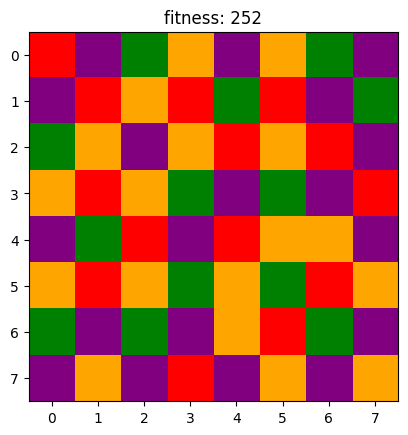

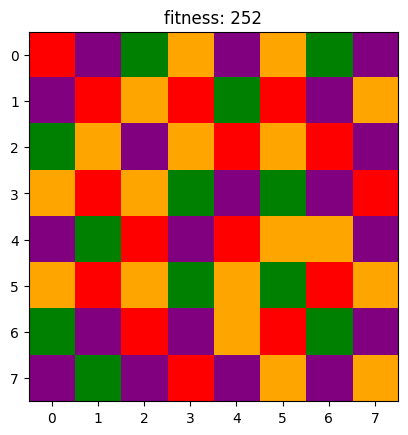

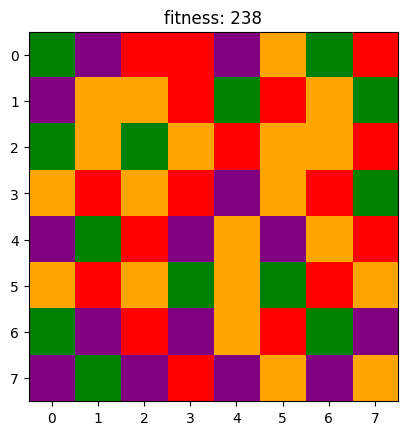

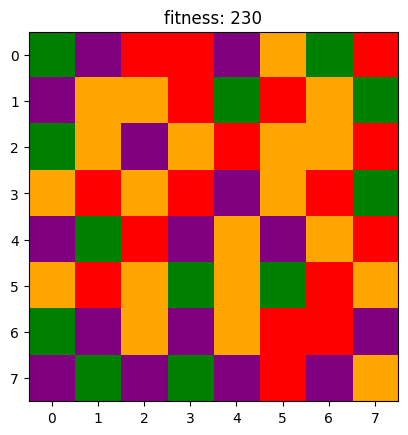

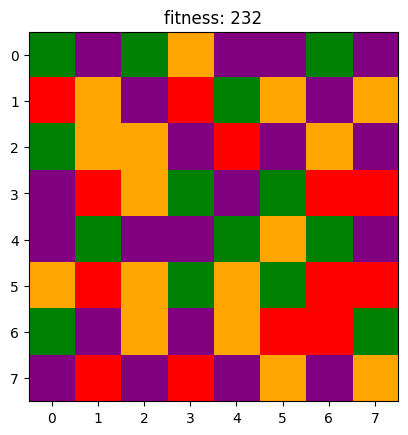

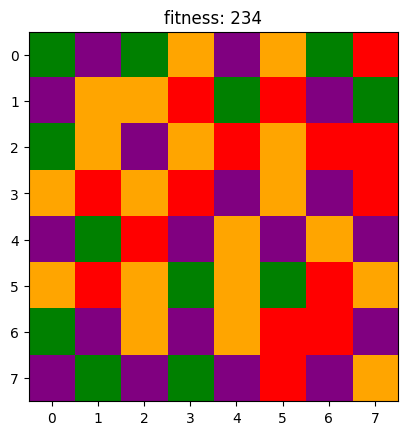

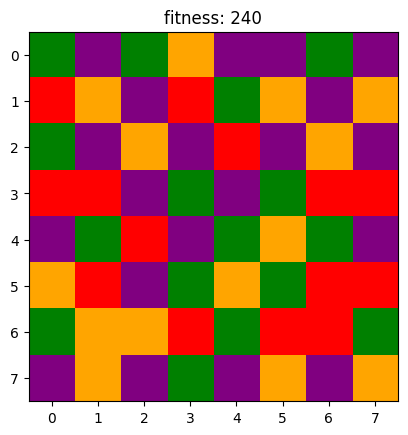

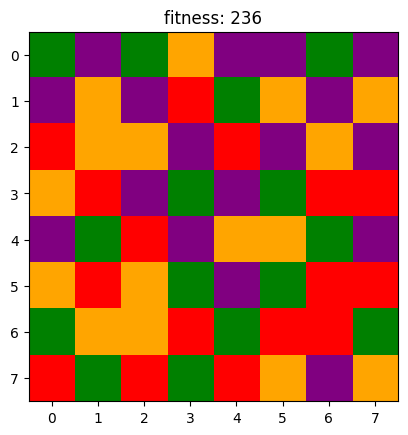

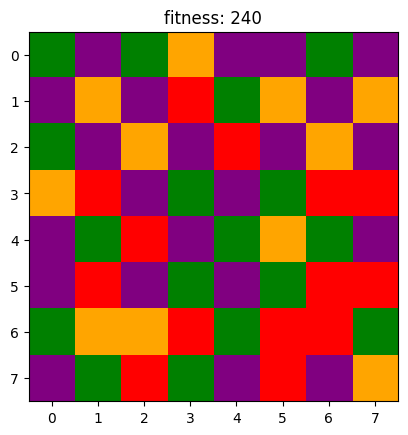

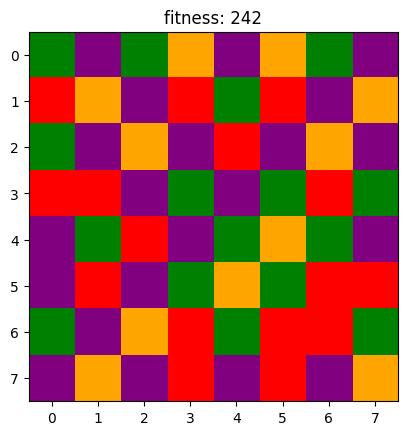

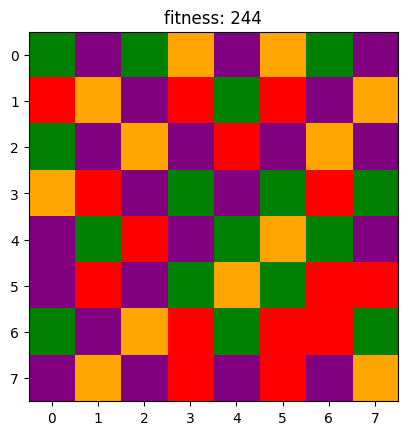

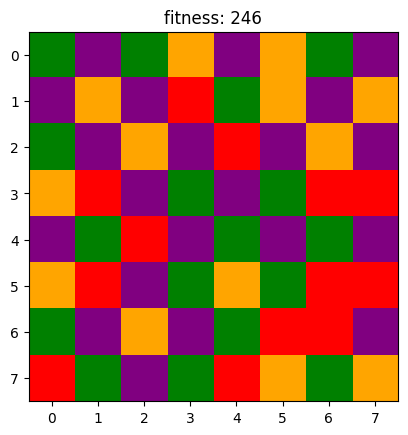

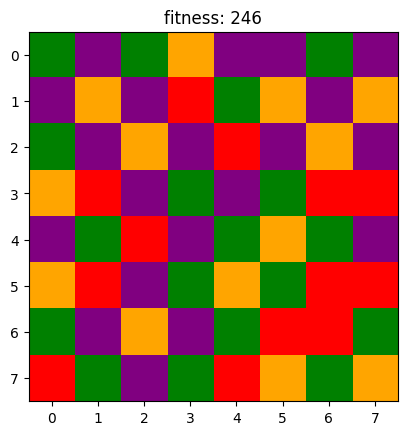

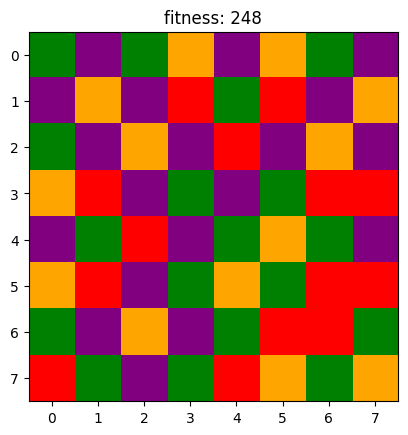

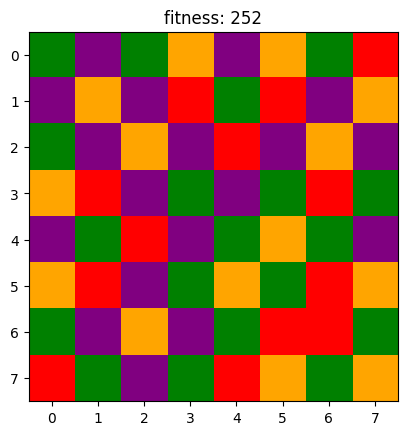

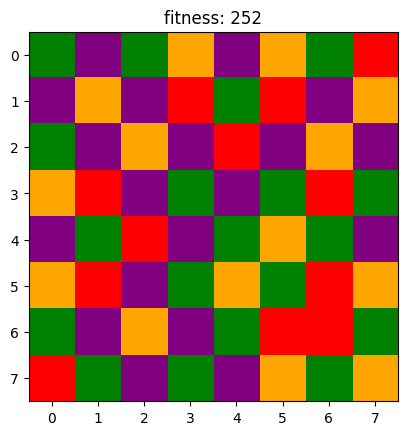

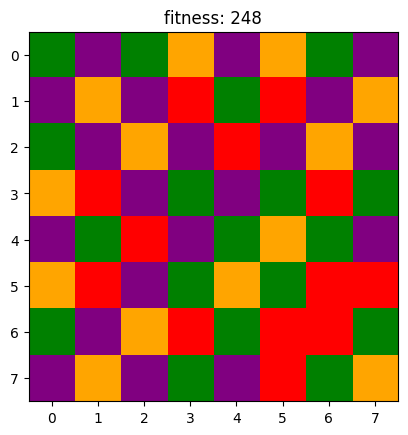

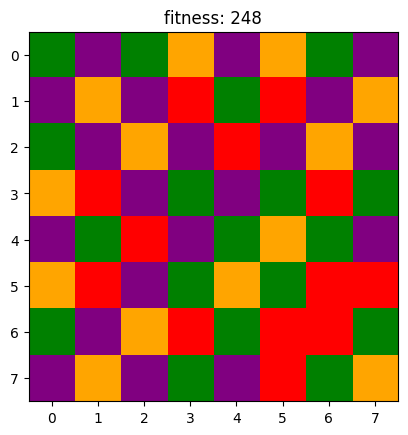

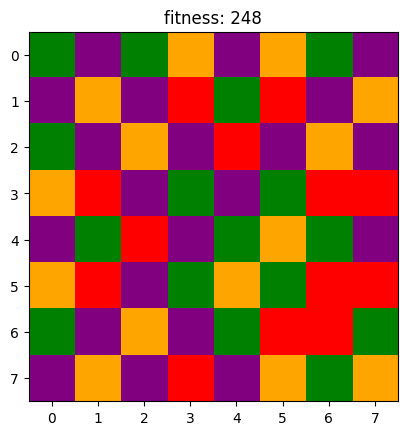

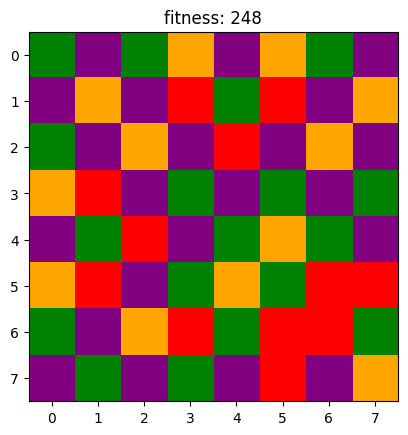

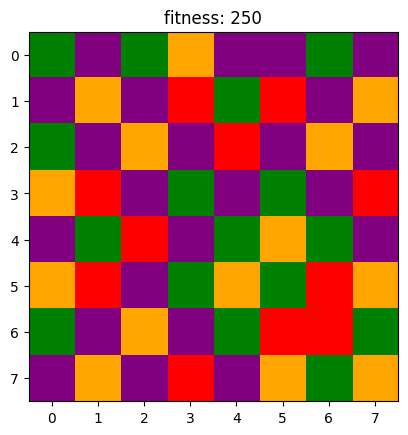

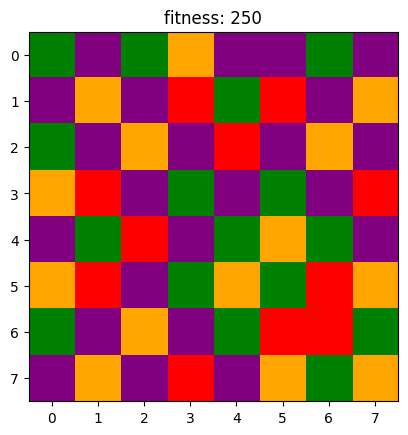

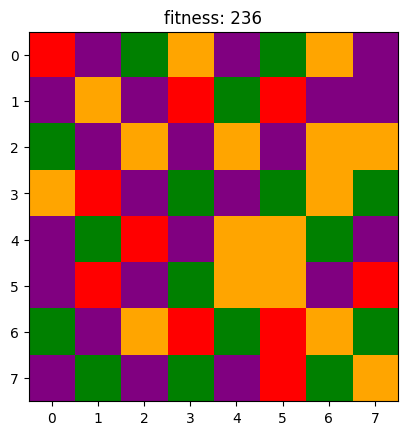

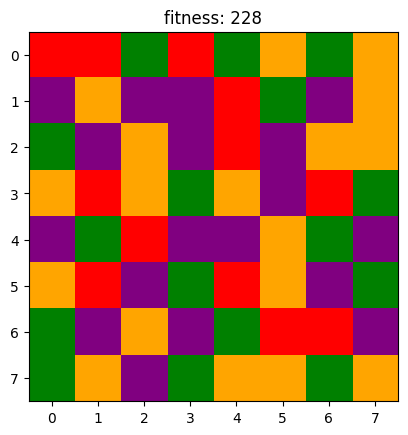

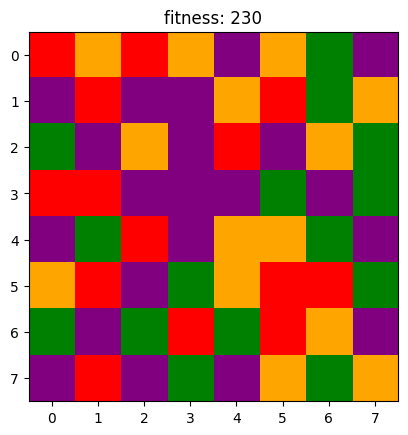

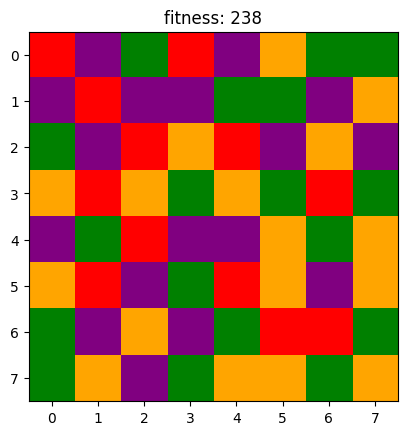

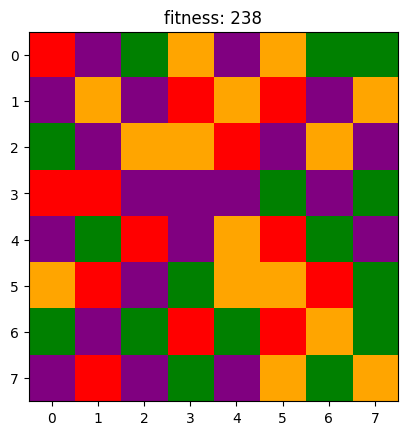

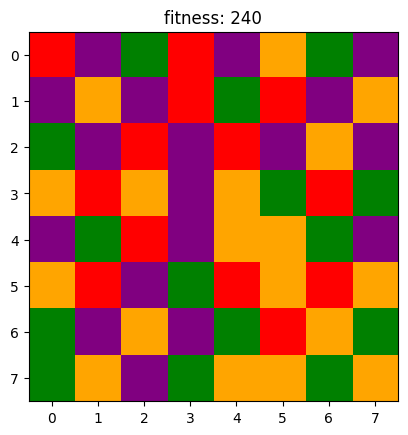

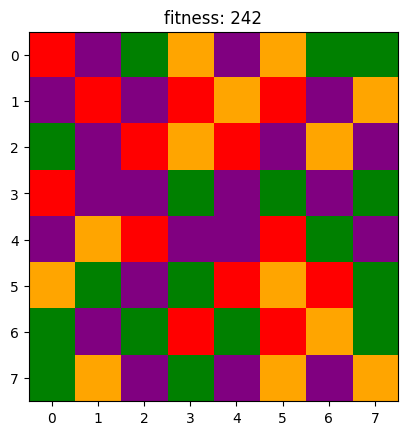

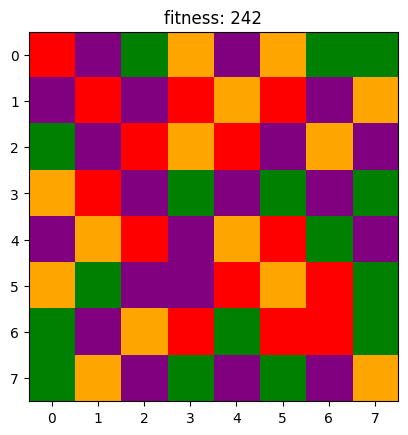

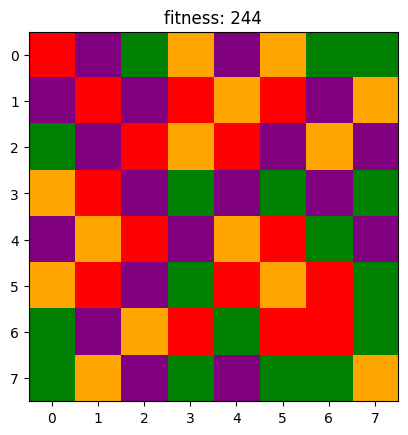

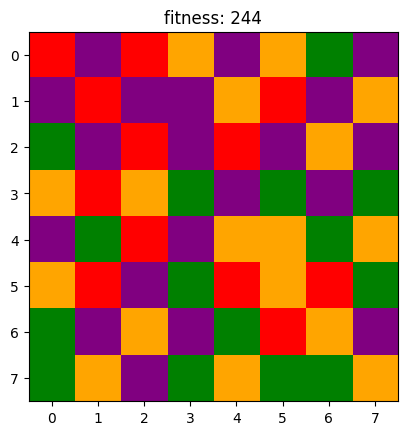

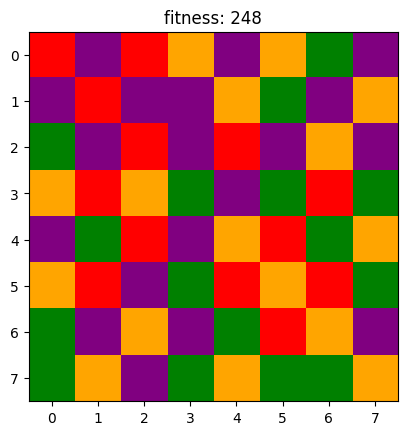

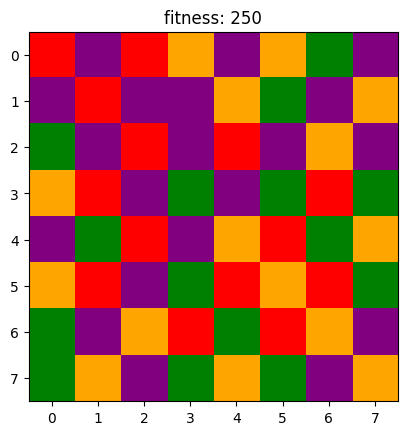

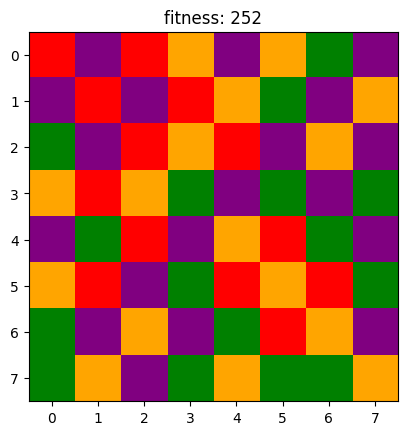

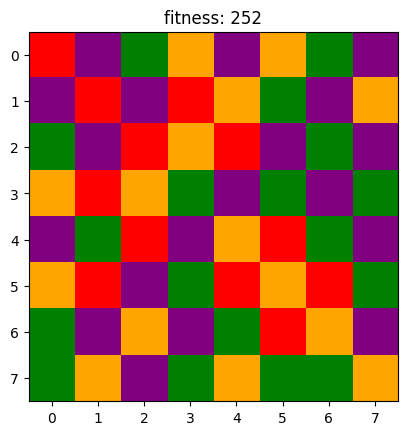

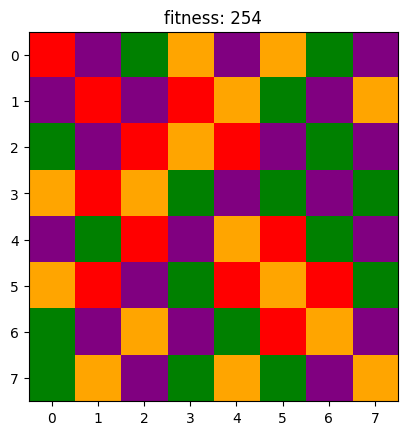

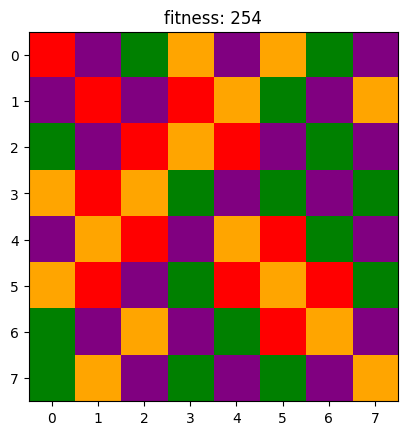

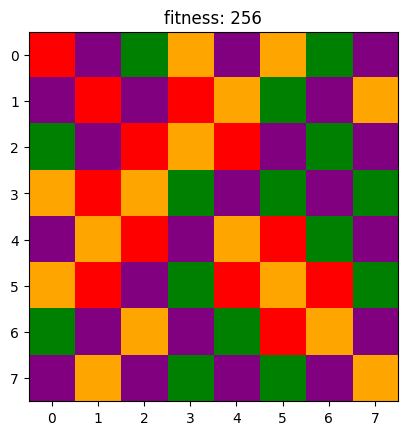

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import random
# colors, color bits and color representation
colorz = ['red', 'green', 'purple', 'orange']
colorBits = ['00', '01', '10', '11']
colorRep = ['0.1', '0.2', '0.3', '0.4']

# create initial population


def checkboard(n):
    dataz = np.random.choice(colorz, size=(n, n))
    datas = np.random.rand(n, n)
    dataInBits = np.random.choice(colorz, size=(n, n))
    for i in range(n):
        for j in range(n):
            if dataz[i, j] == 'red':
                datas[i, j] = 0.1
                dataInBits[i, j] = '00'
            elif dataz[i, j] == 'green':
                datas[i, j] = 0.2
                dataInBits[i, j] = '01'
            elif dataz[i, j] == 'purple':
                datas[i, j] = 0.3
                dataInBits[i, j] = '10'
            elif dataz[i, j] == 'orange':
                datas[i, j] = 0.4
                dataInBits[i, j] = '11'
    return dataInBits

# fitness function


def fitness(data):
    fit = 0
    leng = len(data)
    for i in range(leng):
        for j in range(leng):
            point = data[i, j]
            if j != leng-1 and point != data[i, j+1]:
                fit += 1
            if i != leng-1 and point != data[i+1, j]:
                fit += 1
            if j != 0 and point != data[i, j-1]:
                fit += 1
            if i != 0 and point != data[i-1, j]:
                fit += 1
            if i == 0:
                fit += 1
            if i == leng-1:
                fit += 1
            if j == 0:
                fit += 1
            if j == leng-1:
                fit += 1

    return fit


# generate initial population
sample1 = checkboard(8)
sample2 = checkboard(8)
sample3 = checkboard(8)
sample4 = checkboard(8)
sample5 = checkboard(8)
sample6 = checkboard(8)
sample7 = checkboard(8)
sample8 = checkboard(8)
sample9 = checkboard(8)
sample10 = checkboard(8)

# selecting samples accoring to their fitness so every sample has a chance that depends on its fitness weight
listOfFirstGen = [sample1, sample2, sample3, sample4,
                  sample5, sample6, sample7, sample8, sample9, sample10]


fitnesses = [fitness(sample1), fitness(sample2), fitness(sample3), fitness(sample4),
             fitness(sample5), fitness(sample6), fitness(sample7), fitness(sample8), fitness(sample9), fitness(sample10)]

listOfFirstGenFit = [fitness(sample1), fitness(sample2), fitness(sample3), fitness(sample4), fitness(sample5),
                     fitness(sample6), fitness(sample7), fitness(sample8), fitness(sample9), fitness(sample10)]

sorttedFitness = sorted((e, i) for i, e in enumerate(fitnesses))

# multiply by 1 to start of list for second multiply by 10, for third multiply by 100 so on
count = 5
sorttedFitnessOfWithMargin = sorttedFitness.copy()
for i in range(10):
    sorttedFitnessOfWithMargin[i] = (
        sorttedFitness[i][0]*count, sorttedFitness[i][1])
    count += 5
listOfUpdatedFitness = []
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in range(10):
    listOfUpdatedFitness.append(sorttedFitnessOfWithMargin[i][0])
    labels[i] = sorttedFitnessOfWithMargin[i][1]
listOfRandomChoices = random.choices(
    labels, weights=listOfUpdatedFitness, k=10)
first = np.random.choice(listOfRandomChoices, size=10, replace=False)

# split the list each 2 elements


def split(arr, size):
    arrs = []
    while len(arr) > size:
        pice = arr[:size]
        arrs.append(pice)
        arr = arr[size:]
    arrs.append(arr)
    return arrs


first = split(first, 2)

# loop to check if each array inside first array are the same if yes then regenerate
for i in range(5):
    if first[i][0] == first[i][1]:
        first = np.random.choice(
            listOfRandomChoices, size=10, replace=False)
        first = split(first, 2)
        break
    else:
        pass

# crossover function


def crossover(data, data2):
    leng = len(data)
    temp = np.copy(data)
    temp2 = np.copy(data2)
    for i in range(leng):
        randomList = np.arange(i, leng).tolist()
        indexes = np.random.choice(
            randomList, size=int(np.fix((leng-i)/2)), replace=False)
        for j in indexes:
            temp[i, j] = data2[j, i]
            temp2[j, i] = data[i, j]

    return temp, temp2

# convert bits to numbers to show the board


def convert(boardInBits):
    showboard = np.zeros((8, 8))
    for i in range(8):
        for j in range(8):
            if boardInBits[i, j] == '00':
                showboard[i, j] = 0.1
            elif boardInBits[i, j] == '01':
                showboard[i, j] = 0.2
            elif boardInBits[i, j] == '10':
                showboard[i, j] = 0.3
            elif boardInBits[i, j] == '11':
                showboard[i, j] = 0.4
    return showboard

# show the board


def show(board, title):
    col = colors.ListedColormap(colorz)
    fig, ax = plt.subplots()
    im = ax.imshow(board, cmap=col)
    plt.title("fitness: "+str(title))


# generate new sample for generation 2
sample1, sample2 = crossover(
    listOfFirstGen[first[0][0]], listOfFirstGen[first[0][1]])
sample3, sample4 = crossover(
    listOfFirstGen[first[1][0]], listOfFirstGen[first[1][1]])
sample5, sample6 = crossover(
    listOfFirstGen[first[2][0]], listOfFirstGen[first[2][1]])
sample7, sample8 = crossover(
    listOfFirstGen[first[3][0]], listOfFirstGen[first[3][1]])
sample9, sample10 = crossover(
    listOfFirstGen[first[4][0]], listOfFirstGen[first[4][1]])
fitnesses = [fitness(sample1), fitness(sample2), fitness(sample3), fitness(sample4),
             fitness(sample5), fitness(sample6), fitness(sample7), fitness(sample8), fitness(sample9), fitness(sample10)]


#  mutation function

def mutation(data, fitnesss):
    leng = len(data)
    bitsArray = ['00', '01', '10', '11']
    for i in range(leng):
        randomList = np.arange(i, leng).tolist()
        indexes = np.random.choice(
            randomList, size=int(np.fix((leng-i)/2)), replace=False)
        for j in indexes:
            data[i, j] = np.random.choice(bitsArray)
    fitnessOfNewData = fitness(data)
    if (fitnessOfNewData <= fitnesss):
        mutation(data, fitnessOfNewData)
    return data

# function to check if we got the best solution or not


def checkAnswer(listOfFitness):
    # iterate through bestFit and check if close to answer %90 of 256
    for i in range(len(listOfFitness)):
        if (listOfFitness[i] == 256):
            return True, i
    return False, -1


# variables to store the best fitness and the best board, and some local vars
checked, i = checkAnswer(fitnesses)
loopthrough = False
loopcount = 0
bestofbest = 0
bestofbestBoard = np.zeros((8, 8))
lastBest = 0

# get 5 old best generation
while (loopthrough == False):
    # randomize the seed
    np.random.seed(loopcount)
    # selecting samples accoring to their fitness so every sample has a chance that depends on its fitness weight
    listOfFirstGen = [sample1, sample2, sample3, sample4,
                      sample5, sample6, sample7, sample8, sample9, sample10]
    fitnesses = [fitness(sample1), fitness(sample2), fitness(sample3), fitness(sample4),
                 fitness(sample5), fitness(sample6), fitness(sample7), fitness(sample8), fitness(sample9), fitness(sample10)]
    sorttedFitness = sorted((e, i) for i, e in enumerate(fitnesses))
    count = 5
    sorttedFitnessOfWithMargin = sorttedFitness.copy()
    for i in range(10):
        sorttedFitnessOfWithMargin[i] = (
            sorttedFitness[i][0]*count, sorttedFitness[i][1])
        count += 5
    listOfUpdatedFitness = []
    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    for i in range(10):
        listOfUpdatedFitness.append(sorttedFitnessOfWithMargin[i][0])
        labels[i] = sorttedFitnessOfWithMargin[i][1]
    listOfRandomChoices = random.choices(
        labels, weights=listOfUpdatedFitness, k=10)
    first = np.random.choice(listOfRandomChoices, size=10, replace=False)
    first = split(first, 2)

    # loop to check if each array inside first array are the same if yes then regenerate
    for i in range(5):
        if first[i][0] == first[i][1]:
            first = np.random.choice(
                listOfRandomChoices, size=10, replace=False)
            first = split(first, 2)
            break
        else:
            pass
    # crossover samples
    sample1, sample2 = crossover(
        listOfFirstGen[first[0][0]], listOfFirstGen[first[0][1]])
    sample3, sample4 = crossover(
        listOfFirstGen[first[1][0]], listOfFirstGen[first[1][1]])
    sample5, sample6 = crossover(
        listOfFirstGen[first[2][0]], listOfFirstGen[first[2][1]])
    sample7, sample8 = crossover(
        listOfFirstGen[first[3][0]], listOfFirstGen[first[3][1]])
    sample9, sample10 = crossover(
        listOfFirstGen[first[4][0]], listOfFirstGen[first[4][1]])
    listOfFirstGen = [sample1, sample2, sample3, sample4,
                      sample5, sample6, sample7, sample8, sample9, sample10]
    fitnesses = [fitness(sample1), fitness(sample2), fitness(sample3), fitness(sample4),
                 fitness(sample5), fitness(sample6), fitness(sample7), fitness(sample8), fitness(sample9), fitness(sample10)]
    checked, i = checkAnswer(fitnesses)

    # if we got the best solution then break the loop
    if (checked == True):
        print("found answer in generation", fitnesses)
        bestofbest = fitnesses[i]
        bestofbestBoard = listOfFirstGen[i]
        loopthrough = True
        break
    # show the best board of this generation
    localBest = max(fitnesses)
    max_index = fitnesses.index(max(fitnesses))
    showLocalBest = listOfFirstGen[max_index]
    localBoard = convert(showLocalBest)
    show(localBoard, localBest)
    # if we got better solution then save it
    if (max(fitnesses) > bestofbest):
        bestofbest = max(fitnesses)
        max_index = fitnesses.index(max(fitnesses))
        bestofbestBoard = listOfFirstGen[max_index]
        lastBest = loopcount
    # if we didnt get the best solution in every 20 generation then mutate
    if (loopcount == lastBest+20):
        print('mutate', loopcount)
        lastBest = loopcount
        sample1 = mutation(sample1, fitnesses[0])
        sample2 = mutation(sample2, fitnesses[1])
        sample3 = mutation(sample3, fitnesses[2])
        sample4 = mutation(sample4, fitnesses[3])
        sample5 = mutation(sample5, fitnesses[4])
        sample6 = mutation(sample6, fitnesses[5])
        sample7 = mutation(sample7, fitnesses[6])
        sample8 = mutation(sample8, fitnesses[7])
        sample9 = mutation(sample9, fitnesses[8])
        sample10 = mutation(sample10, fitnesses[9])

    loopcount += 1
    if (loopcount == 10000):
        loopthrough = True

print("best of best", bestofbest)
print("best of best board", bestofbestBoard)
print("loop count", loopcount)


showboard = convert(bestofbestBoard)

show(showboard, str(bestofbest))


plt.show()
